In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Función para cargar cada batch
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [5]:
directorio="cifar-10-python/cifar-10-batches-py/"

### Ver imagenes de ejemplo

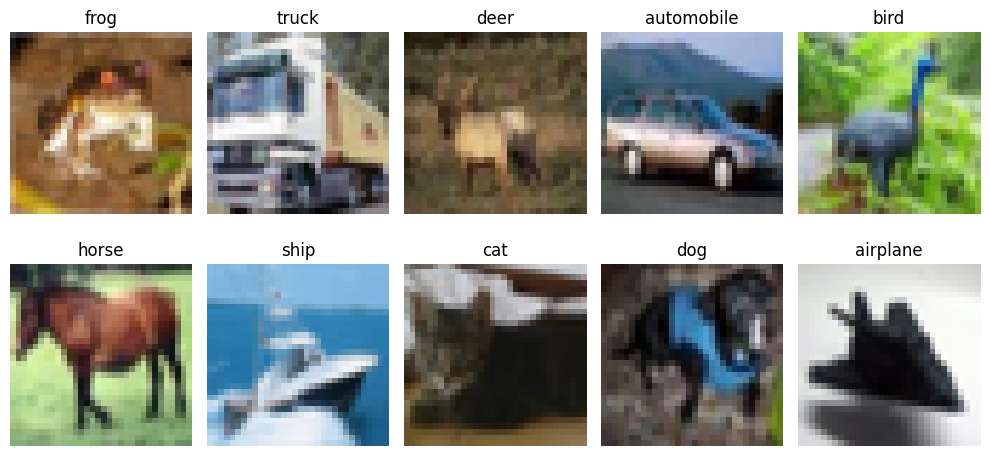

In [6]:
# Cargar el archivo de metadatos para obtener los nombres de las clases
meta = unpickle(f"{directorio}batches.meta")
label_names = [label.decode('utf-8') for label in meta[b'label_names']]

# Cargar uno de los batches (por ejemplo, el primero)
batch = unpickle(f"{directorio}data_batch_1")
images = batch[b'data']
labels = batch[b'labels']

# Cada imagen es un vector de 3072 = 32*32*3 (RGB)
# Vamos a mostrar una imagen por clase
shown_classes = set()
plt.figure(figsize=(10, 5))

for i in range(len(images)):
    label = labels[i]
    if label not in shown_classes:
        shown_classes.add(label)

        img = images[i].reshape(3, 32, 32).transpose(1, 2, 0)  # Convertir a HxWxC
        plt.subplot(2, 5, len(shown_classes))
        plt.imshow(img)
        plt.title(label_names[label])
        plt.axis('off')

    if len(shown_classes) == 10:
        break

plt.tight_layout()
plt.show()

# Comprimir

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data=images

X = data
y = np.array(labels)

# Escalar y reducir dimensión
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducir dimensiones para visualización y eficiencia
pca = PCA(n_components=50)  # luego usaremos 2D para visualización
X_pca = pca.fit_transform(X_scaled)

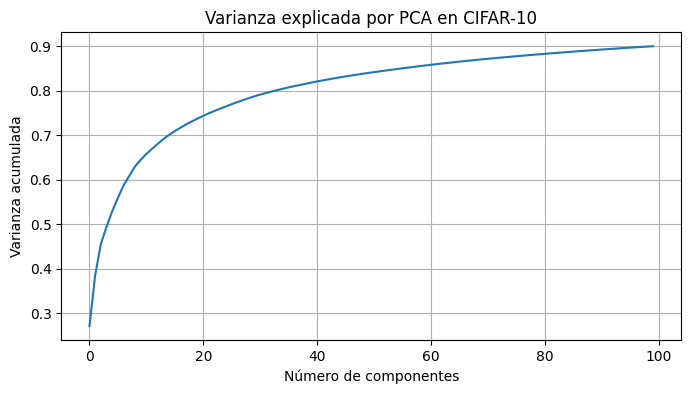

In [10]:
# PCA visualzación
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_full = PCA()
pca_full.fit(X_scaled)

plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_[:100]))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Varianza explicada por PCA en CIFAR-10')
plt.grid(True)
plt.show()


In [12]:
# Visualización con T-SNE

C:\Users\USUARIO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


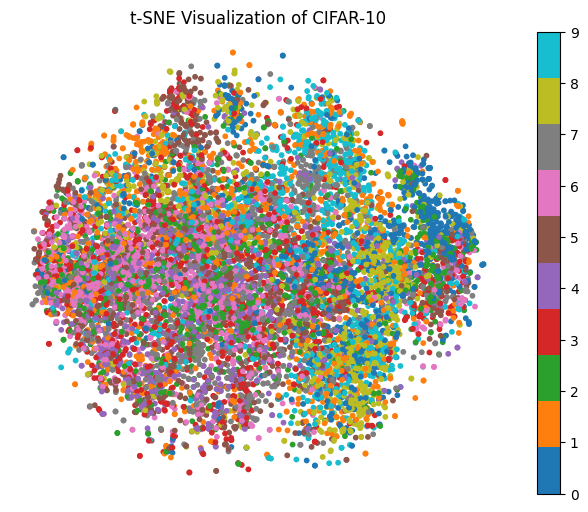

In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reducir a 2D con t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualizar usando las verdaderas etiquetas
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=10)
plt.title("t-SNE Visualization of CIFAR-10")
plt.axis('off')
plt.colorbar()
plt.show()


# Clustering

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

kmeans = KMeans(n_clusters=10, random_state=42)
y_pred_kmeans = kmeans.fit_predict(X_pca)

print("ARI (KMeans):", adjusted_rand_score(y, y_pred_kmeans))


ARI (KMeans): 0.0404803930587419


In [18]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=10)
y_pred_agg = agg.fit_predict(X_pca)

print("ARI (Agglomerative):", adjusted_rand_score(y, y_pred_agg))


ARI (Agglomerative): 0.04574519102946219


In [19]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=5, min_samples=5)
y_pred_dbscan = dbscan.fit_predict(X_pca)

print("Número de clusters (DBSCAN):", len(set(y_pred_dbscan)))
print("ARI (DBSCAN):", adjusted_rand_score(y, y_pred_dbscan))


Número de clusters (DBSCAN): 1
ARI (DBSCAN): 0.0
